In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

hotels = pd.read_csv(r"C:\Users\bradj\Downloads\Hotel Reservations.csv")
hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [2]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [3]:
hotels.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [4]:
hotels.isna().sum()
## No missing values

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
## Creating a new column for total number of guests by combining number of adults and children.
## Moving new column to align properly with current columns.
hotels['total_guests'] = hotels['no_of_adults'] + hotels['no_of_children']
hotels.insert(3,'total_guests', hotels.pop('total_guests'))
hotels.head()

,Booking_ID,no_of_adults,no_of_children,total_guests,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,2,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,1,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,2,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,2,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
## Creating a new column for total number of nights stayed by combining number of weekend nights and week nights.
## Moving new column to align properly with current columns
hotels['total_nights'] = hotels['no_of_weekend_nights'] + hotels['no_of_week_nights']
hotels.insert(6,'total_nights', hotels.pop('total_nights'))
hotels.head()

,Booking_ID,no_of_adults,no_of_children,total_guests,no_of_weekend_nights,no_of_week_nights,total_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,...,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,2,1,2,3,Meal Plan 1,0,Room_Type 1,...,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,2,3,5,Not Selected,0,Room_Type 1,...,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,1,2,1,3,Meal Plan 1,0,Room_Type 1,...,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,2,0,2,2,Meal Plan 1,0,Room_Type 1,...,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,2,1,1,2,Not Selected,0,Room_Type 1,...,2018,4,11,Online,0,0,0,94.50,0,Canceled


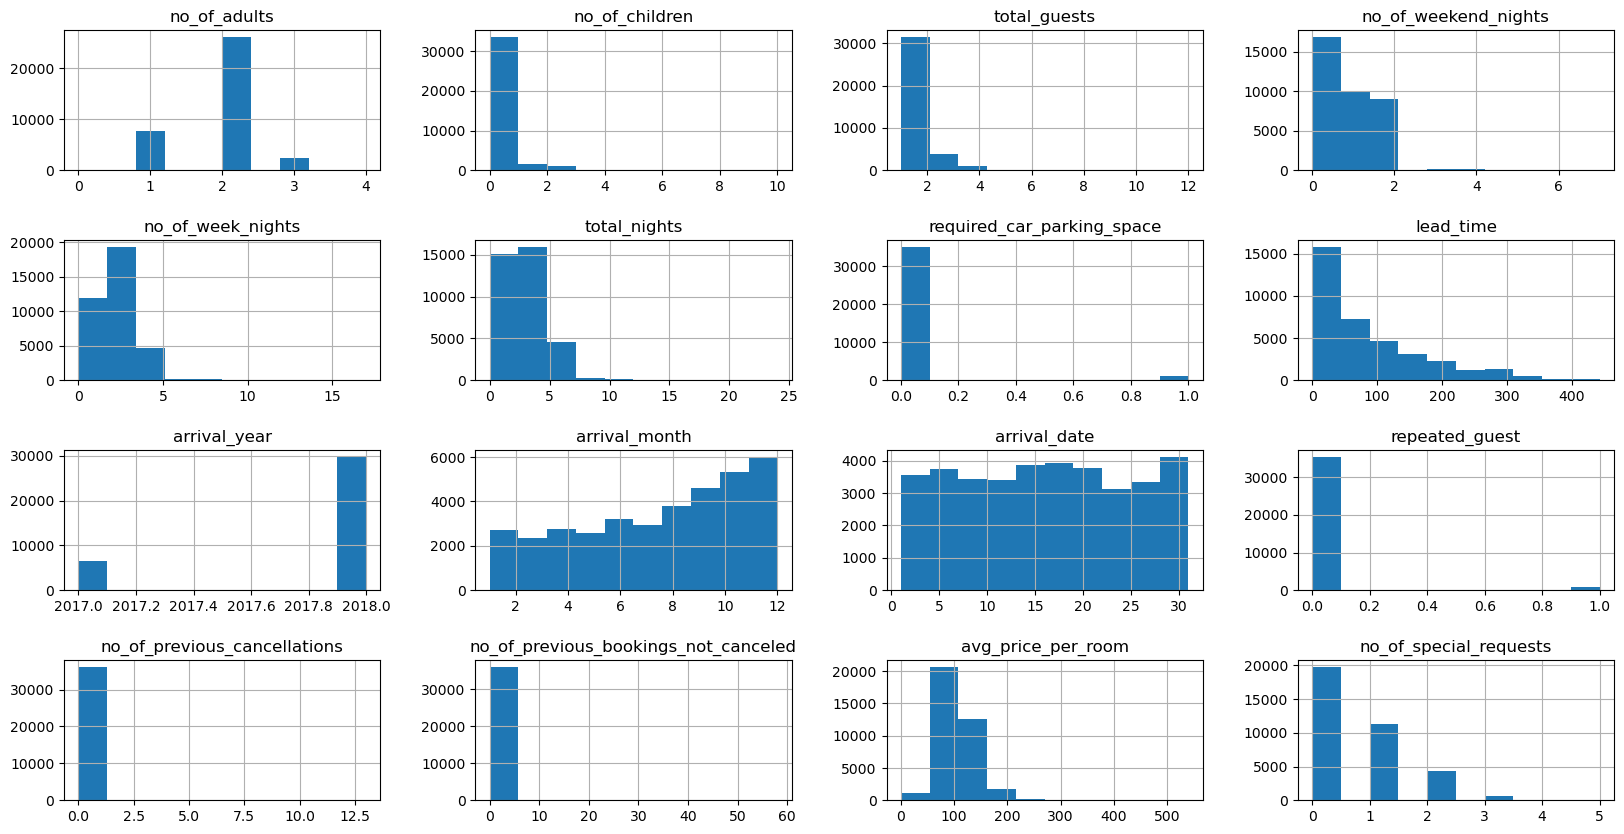

In [7]:
hotels.hist(figsize=(20,10))
plt.subplots_adjust(hspace=0.5)

In [8]:
## From the graph it appears that all entries for this column are 0, lets investigate.
hotels.no_of_previous_bookings_not_canceled.value_counts()
## Out of 36,275 entries, 35,463 (97.7%) are 0.  Is this column really necessary?

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [9]:
## Same goes for number of previous cancellations.
hotels.no_of_previous_cancellations.value_counts()
## 99% of this column is 0! Again, is this column needed?

0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

In [10]:
## These columns can be labeled as outliers and thus removed.
hotels.drop(columns=['no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled'], inplace=True)
hotels.head()

,Booking_ID,no_of_adults,no_of_children,total_guests,no_of_weekend_nights,no_of_week_nights,total_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,2,1,2,3,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,2,3,5,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,106.68,1,Not_Canceled
2,INN00003,1,0,1,2,1,3,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,60.00,0,Canceled
3,INN00004,2,0,2,0,2,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,100.00,0,Canceled
4,INN00005,2,0,2,1,1,2,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,94.50,0,Canceled


In [11]:
## Total nights stayed also appears to may have an outlier.
hotels.total_nights.value_counts()

3     10052
2      8472
1      6604
4      5893
5      2589
6      1031
7       973
8       179
9       111
10      109
0        78
11       39
14       32
15       31
12       24
13       18
20       11
19        6
16        6
17        5
21        4
18        3
23        2
22        2
24        1
Name: total_nights, dtype: int64

In [12]:
## Only a total of 9 entries are over 20 days long.  Lets remove those.
hotels = hotels[hotels.total_nights <= 20]
hotels.total_nights.value_counts()

3     10052
2      8472
1      6604
4      5893
5      2589
6      1031
7       973
8       179
9       111
10      109
0        78
11       39
14       32
15       31
12       24
13       18
20       11
19        6
16        6
17        5
18        3
Name: total_nights, dtype: int64

In [13]:
## Total guests appears to have an outlier.
hotels.total_guests.value_counts()

2     23939
1      7546
3      3851
4       912
5        15
12        1
10        1
11        1
Name: total_guests, dtype: int64

In [14]:
## Total number of guests above 5 are outliers and can be removed.
hotels = hotels[hotels.total_guests <= 5]
hotels.total_guests.value_counts()

2    23939
1     7546
3     3851
4      912
5       15
Name: total_guests, dtype: int64

In [15]:
## Finally, lets check average price for any outliers.
hotels.avg_price_per_room.value_counts()

65.00     848
75.00     826
90.00     703
95.00     668
115.00    662
         ... 
90.06       1
212.42      1
83.48       1
70.42       1
167.80      1
Name: avg_price_per_room, Length: 3926, dtype: int64

In [16]:
## This leaves a lot to be desired, let's try it for anything over $300.
hotels.avg_price_per_room[hotels.avg_price_per_room > 300]

4150     306.00
9461     375.50
13944    316.00
14773    332.57
20900    365.00
25670    306.00
33114    540.00
33955    314.10
34306    349.63
Name: avg_price_per_room, dtype: float64

In [17]:
## Only 9 entries over $300.  Let's remove those.
hotels = hotels[hotels.avg_price_per_room < 300]

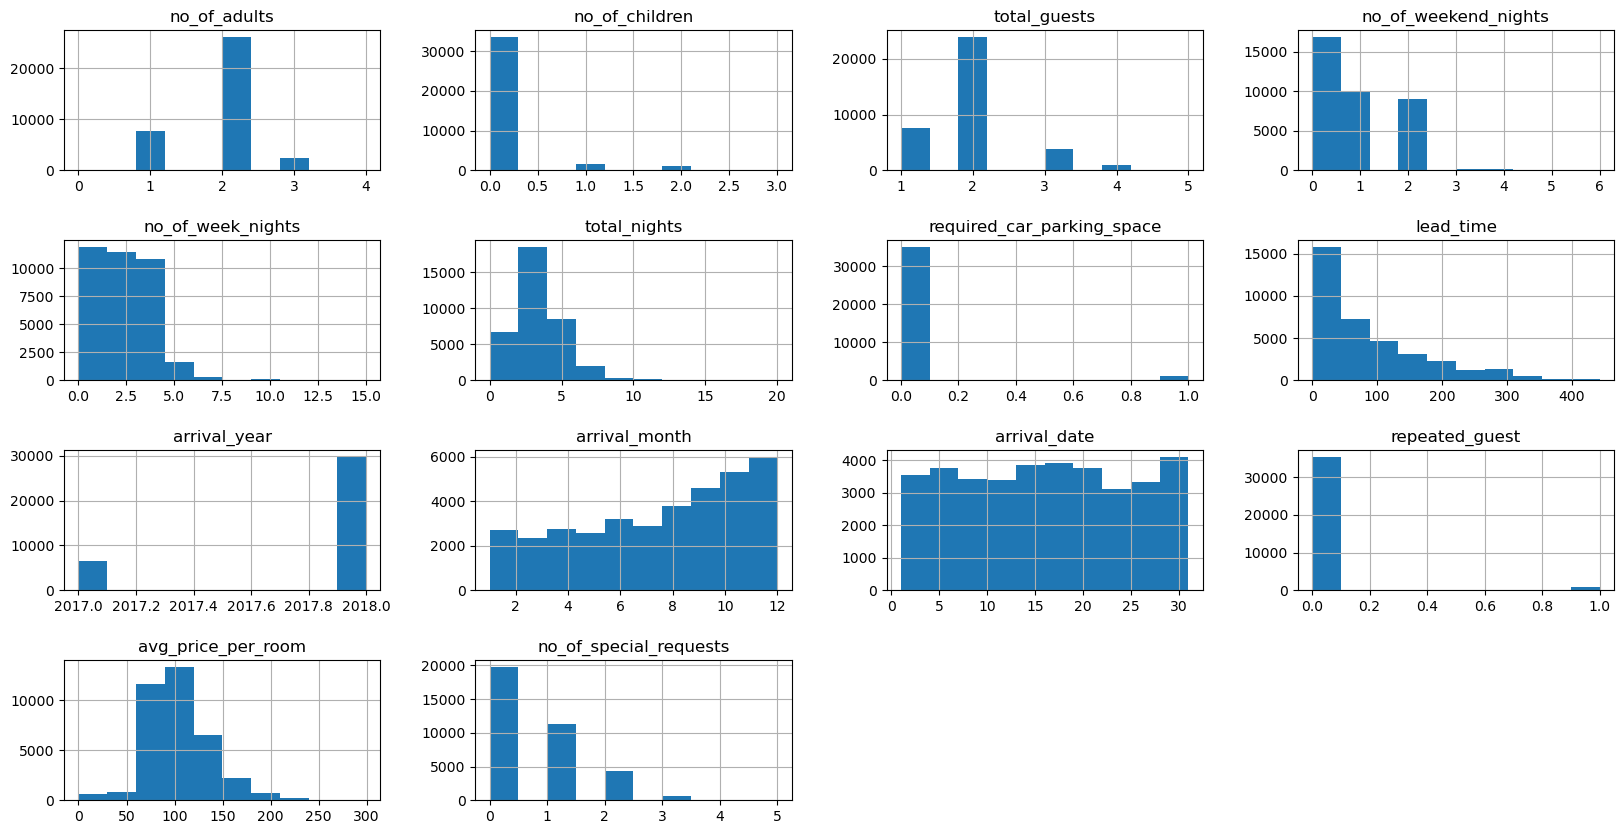

In [18]:
## After removing all outliers let's take another look at the histogram chart.
hotels.hist(figsize=(20,10))
plt.subplots_adjust(hspace=0.5)

In [19]:
## We have removed two columns but created two more so total columns remains at 19.
## Total entries has dropped from 36,275 to 36,249.
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36249 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Booking_ID                  36249 non-null  object 
 1   no_of_adults                36249 non-null  int64  
 2   no_of_children              36249 non-null  int64  
 3   total_guests                36249 non-null  int64  
 4   no_of_weekend_nights        36249 non-null  int64  
 5   no_of_week_nights           36249 non-null  int64  
 6   total_nights                36249 non-null  int64  
 7   type_of_meal_plan           36249 non-null  object 
 8   required_car_parking_space  36249 non-null  int64  
 9   room_type_reserved          36249 non-null  object 
 10  lead_time                   36249 non-null  int64  
 11  arrival_year                36249 non-null  int64  
 12  arrival_month               36249 non-null  int64  
 13  arrival_date                362

In [20]:
## Much tidier. Now let's take a small look into cancellation relations before moving onto the exploratory phase.
booking_status_count = hotels.groupby('booking_status')['Booking_ID'].count().reset_index()
booking_status_count
## 11,869 out of a total 36,249 for a cancellation rate of 32.7%. This is pretty alarming.

,booking_status,Booking_ID
0,Canceled,11869
1,Not_Canceled,24380


In [21]:
average_price_status = hotels.groupby('booking_status')['avg_price_per_room'].mean().reset_index()
average_price_status
## Does not appear that price per room dictates cancellation rate very much.

,booking_status,avg_price_per_room
0,Canceled,110.436673
1,Not_Canceled,99.878014


In [22]:
lead_time_status = hotels.groupby('booking_status')['lead_time'].mean().reset_index()
lead_time_status
## This shows that a much longer lead time significantly affects cancellation rate.

,booking_status,lead_time
0,Canceled,139.304491
1,Not_Canceled,58.941345
